In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("bank.csv")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


1.SIZE

In [6]:
df.size

768587

In [7]:
df.shape

(45211, 17)

2.DATATYPES OF EACH COLUMN

In [8]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

3.MISSING VALUES

In [8]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

4.UNIQUE VALUES

In [9]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
deposit         2
dtype: int64

5.MEAN MEDIAN SD OF duration

In [10]:
df['duration'].mean()

258.1630797814691

In [11]:
df['duration'].median()

180.0

In [12]:
df['duration'].std()

257.52781226517095

6.OUTLIERS IN DURATION

In [13]:

Q1 = np.percentile(df['duration'], 25)
Q3 = np.percentile(df['duration'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_indices = np.where((df['duration'] < lower_bound) | (df['duration'] > upper_bound))
outliers = df.loc[outlier_indices, 'duration']

print("Outliers in the 'duration' column:")
print(outliers)


Outliers in the 'duration' column:
37       1666
43       1492
53        787
59       1778
61        812
         ... 
45124     701
45199    1166
45200    1556
45206     977
45208    1127
Name: duration, Length: 3235, dtype: int64


7.Find the correlation between numerical columns and discuss any interesting
relationships.

In [17]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


The corretation values 1 means there is a perfect positive linear relationship between them and -1 indicates a perfect negative linear relationsip.
But for the above data there is no such relationships

8.Group the data by a categorical column and compute the aggregate statistics
(e.g., mean, sum) for a numerical column.

In [40]:
df.groupby('marital')['duration'].mean()

marital
divorced    262.517188
married     253.412765
single      266.497967
Name: duration, dtype: float64

In [41]:
df.groupby('marital')['duration'].sum()

marital
divorced    1366927
married     6896375
single      3408509
Name: duration, dtype: int64

In [42]:
df.groupby('marital')['duration'].std()

marital
divorced    263.807016
married     253.164471
single      263.845968
Name: duration, dtype: float64

9.Based on your analysis, provide a brief summary of any insights or patterns
you discovered in the dataset.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

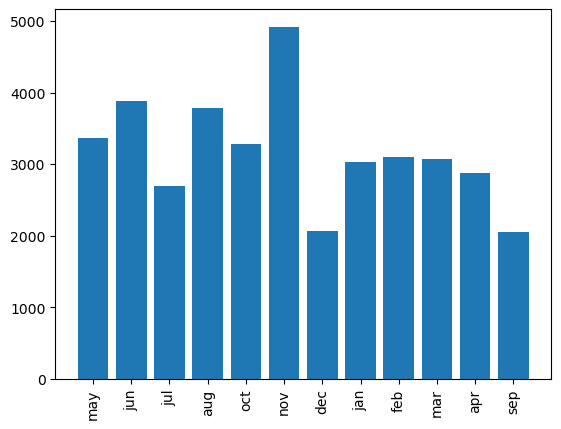

In [45]:
plt.bar(df['month'], df['duration'])
plt.xticks(rotation =90)
plt.show()

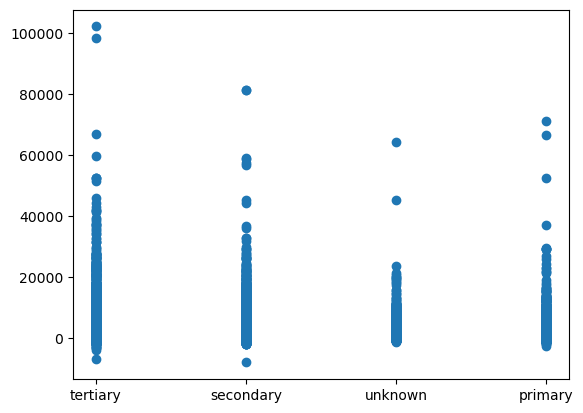

In [46]:
plt.scatter(df['education'], df['balance'])
plt.show()

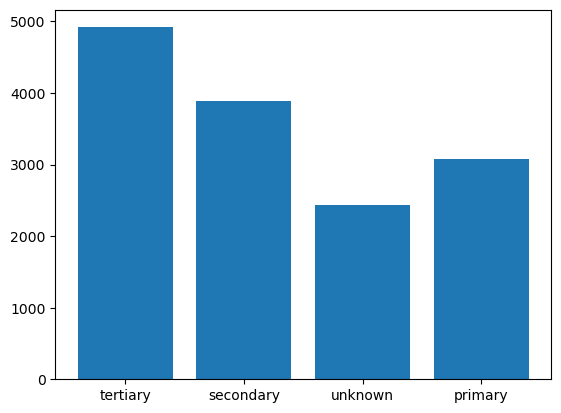

In [48]:
plt.bar(df['education'], df['duration'])
plt.show()